In [1]:
### ValDXer testing
import os
from ValDX.ValidationDX import ValDXer
from ValDX.VDX_Settings import Settings

settings = Settings(name='test_full0.5')
settings.replicates = 1
settings.gamma_range = (2,6)
settings.train_frac = 0.5
settings.RW_exponent = [0]
settings.split_mode = 'r'
settings.HDXer_stride = 10000
settings.RW_do_reweighting = True
import pickle

VDX = ValDXer(settings)
expt_name = 'Experimental'
test_name = "MD_Simulated"


/home/alexi/Documents/ValDX


/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.50
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.51
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.52
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.53
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.54
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.55
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.56
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.57
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.58
Experiment name test_full0.5 already exists. Attempting to change name to test_full0.59
Experiment name test_full0.5 already exists. Atte

In [2]:
print(os.environ["HDXER_PATH"])
print(__name__)

/home/alexi/Documents/HDXer
__main__


In [3]:
import subprocess
from ValDX.helpful_funcs import conda_to_env_dict

# Assuming settings.HDXer_env contains the name of your Conda environment
env_path = conda_to_env_dict(settings.HDXer_env)

command = "echo $HDXER_PATH"
print("command:", command)

# Run the command in the subprocess
output = subprocess.run(command, shell=True, env=env_path, capture_output=True, text=True)

# Capture and print the standard output (stdout)
hdxer_path = output.stdout.strip()  # .strip() removes any trailing newline
print("HDXER_PATH:", hdxer_path)


Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
command: echo $HDXER_PATH
HDXER_PATH: /home/alexi/Documents/HDXer


In [4]:
# BPTI data
BPTI_dir = "/Users/alexi/Library/CloudStorage/OneDrive-Nexus365/Rotation_Projects/Rotation_3/Project/ValDX/raw_data/HDXer_tutorial/BPTI"
BPTI_dir = "/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI"


In [5]:
expt_dir = os.path.join(BPTI_dir, "BPTI_expt_data")

os.listdir(expt_dir)

segs_name = "BPTI_residue_segs.txt"
segs_path = os.path.join(expt_dir, segs_name)

hdx_name = "BPTI_expt_dfracs.dat"
hdx_path = os.path.join(expt_dir, hdx_name)
print(hdx_path)

rates_name = "BPTI_Intrinsic_rates.dat"
rates_path = os.path.join(expt_dir, rates_name)


/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat


In [6]:

VDX.load_HDX_data(HDX_path=hdx_path, SEG_path=segs_path, calc_name=expt_name)
VDX.load_intrinsic_rates(path=rates_path, calc_name=expt_name)


Preparing HDX data for Experimental
Path /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_expt_data/BPTI_expt_dfracs.dat
AVG: ncol = 6, len(names) = 4


In [7]:
print(VDX.rates)

Empty DataFrame
Columns: []
Index: []


In [8]:
print(VDX.paths)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   

   experimental                                          int_rates  
0         False                                                NaN  
1         False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  


In [9]:
sim_name = 'BPTI_MD'

sim_dir = os.path.join(BPTI_dir, "BPTI_simulations")

os.listdir(sim_dir)

md_reps = 1
rep_dirs = ["Run_"+str(i+1) for i in range(md_reps)]

top_name = "bpti_5pti_eq6_protonly.gro"

top_path = os.path.join(sim_dir, rep_dirs[0], top_name)

traj_name = "bpti_5pti_reimg_protonly.xtc"

traj_paths = [os.path.join(sim_dir, rep_dir, traj_name) for rep_dir in rep_dirs]

print(top_path)
print(traj_paths)


VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=sim_name)

/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro
['/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']
                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
2          NaN                                                NaN  

In [10]:
print((traj_paths))

['/home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc']


In [11]:
VDX.load_structures(top_path=top_path, traj_paths=traj_paths, calc_name=test_name)


                                                 HDX  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
1                                                NaN   
2                                                NaN   
3                                                NaN   

                                                 SEG     calc_name  \
0  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...  Experimental   
1                                                NaN  Experimental   
2                                                NaN       BPTI_MD   
3                                                NaN  MD_Simulated   

  experimental                                          int_rates  \
0        False                                                NaN   
1        False  /home/alexi/Documents/ValDX/raw_data/HDXer_tut...   
2          NaN                                                NaN   
3          NaN                                                NaN   

                      

In [12]:
VDX.settings.RW_do_reweighting

True

Random seeds: [42]
Randomly splitting segments for MD_Simulated with random seed 42 and train fraction 0.5
Saved train MD_Simulated segments to /home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt
Train Peptide numbers: [ 0  4  6  8  9 12 13 15 16 17 19 24 25 26 29 32 34 35 39 40]
Saved val MD_Simulated segments to /home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1/val_residue_segs__MD_Simulated_.txt
Val Peptide numbers: [ 1  2  3  5  7 10 11 14 18 20 21 22 23 27 28 30 31 33 36 37 38]
    ResStr  ResEnd    0.167      1.0     10.0    120.0  peptide  \
0       34      35  0.00109  0.00649  0.06306  0.54232       24   
1       22      23  0.00000  0.00000  0.00003  0.00037       13   
2       17      18  0.00028  0.00165  0.01638  0.17975        8   
3       35      36  0.01528  0.08809  0.60233  0.99998       25   
4       11      12  0.99880  1.00000  1.00000  1.00000        4   
5       55      56  0.17259  0.67841  

Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
python /home/alexi/Documents/HDXer/HDXer/calc_hdx.py -t /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_reimg_protonly.xtc -p /home/alexi/Documents/ValDX/raw_data/HDXer_tutorial/BPTI/BPTI_simulations/Run_1/bpti_5pti_eq6_protonly.gro -m BestVendruscolo -log /home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/calc_hdx_train_MD_Simulated_1.log -out /home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/out__train_MD_Simulated_1 -seg /home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/train_residue_segs__MD_Simulated_.txt -mopt "{ 'save_detailed' : True }" --times 0.167 1.0 10.0 120.0 -str 10000
Path to 'HDXER_ENV' environment: /home/alexi/miniconda3/envs/HDXER_ENV
Residue predictions complete


/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ale

Path /home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/out__train_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated True 1
/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING train_MD_Simulated_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 1e-05, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/out__train_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/train_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.

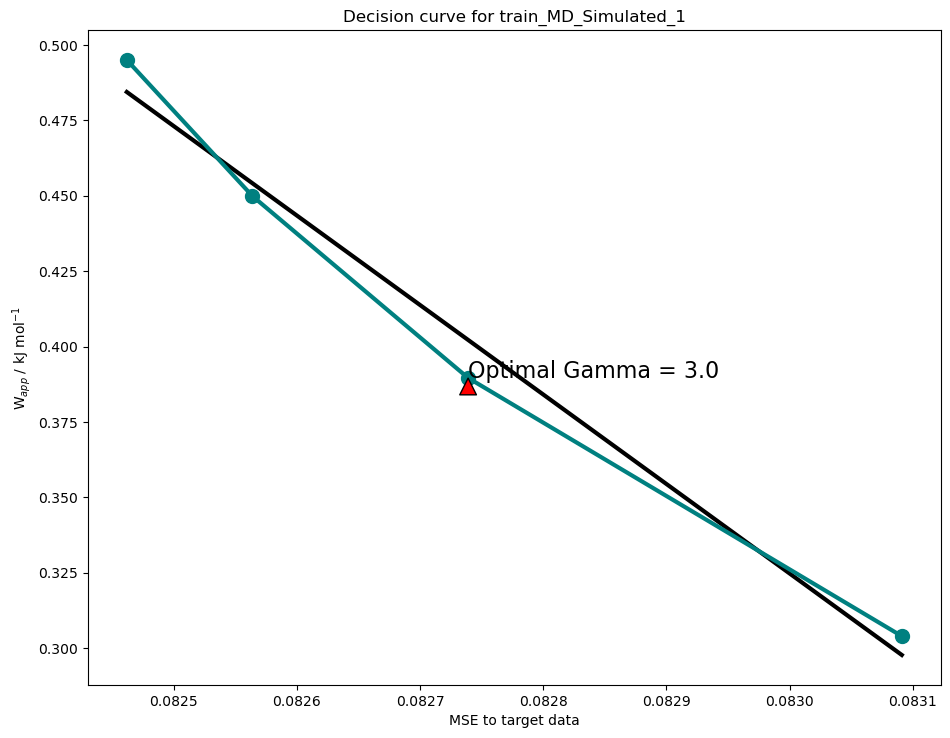

Optimal gamma for train_MD_Simulated_1 is 3.0x10^0
/home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/reweighting_gamma_3x10^0final_segment_fractions.dat
Path /home/alexi/Documents/ValDX/data/test_full0.516/train_MD_Simulated_1/reweighting_gamma_3x10^0final_segment_fractions.dat
RW: ncol = 4, len(names) = 4
(20, 5)
     0.167      1.0     10.0    120.0  peptide
0  0.00011  0.00064  0.00641  0.07424        0
1  0.00006  0.00036  0.00356  0.04188        1
2  0.00942  0.05511  0.43270  0.99889        2
3  0.00001  0.00008  0.00084  0.01007        3
4  0.72544  0.99956  1.00000  1.00000        4
      0.167      1.0     10.0    120.0  peptide
0   0.00011  0.00064  0.00641  0.07424        0
1   0.00006  0.00036  0.00356  0.04188        1
2   0.00942  0.05511  0.43270  0.99889        2
3   0.00001  0.00008  0.00084  0.01007        3
4   0.72544  0.99956  1.00000  1.00000        4
5   0.01071  0.06242  0.47511  0.99956        5
6   0.10357  0.48042  0.99857  1.00000        6

/home/alexi/Documents/HDXer/HDXer/dfpred.py:505: RuntimeWarning: divide by zero encountered in log
  logerr = logf + np.log(err) + np.log(time) # sd(e^Aa) = f * sd(A) * a
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/alexi/miniconda3/envs/HDXER_ENV/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ale

Path /home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1/out__val_MD_Simulated_1Segment_average_fractions.dat
AVG: ncol = 6, len(names) = 4
Experimental MD_Simulated False 1
/home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat
/home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1
/home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat
REWIGHTING val_MD_Simulated_1 with Exponent: 0
[{'do_reweight': True, 'do_params': False, 'stepfactor': 1e-05, 'basegamma': 1, 'predictHDX_dir': ['/home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1'], 'kint_file': '/home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1/out__val_MD_Simulated_1Intrinsic_rates.dat', 'exp_file': '/home/alexi/Documents/ValDX/data/test_full0.516/val_MD_Simulated_1/val_MD_Simulated_1_expt_dfracs.dat', 'times': array([  0.167,   1.   ,  10.   , 120.   ]), 'restart_interval'

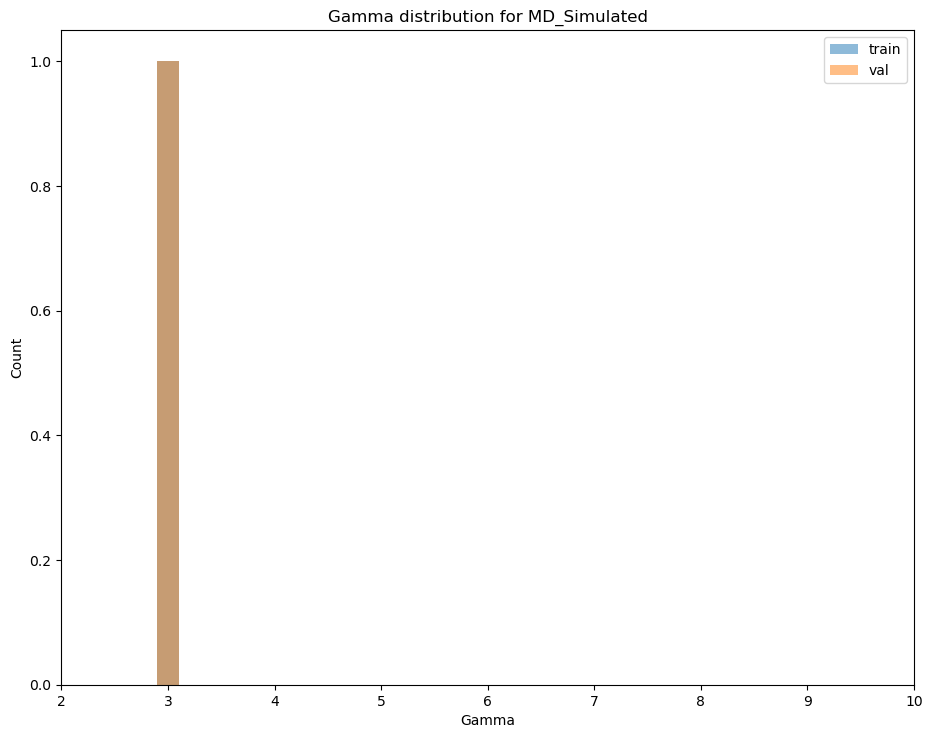

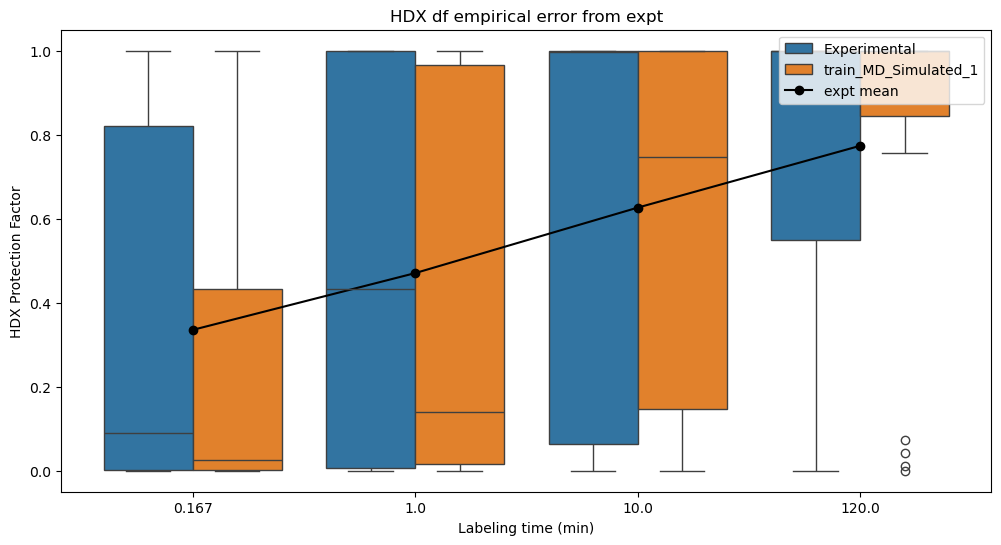

plot_dfracs_compare
      0.167      1.0     10.0    120.0  peptide           calc_name
0   0.15669  0.63957  0.99996  1.00000        0        Experimental
1   0.09039  0.43293  0.99656  1.00000        1        Experimental
2   0.02665  0.14933  0.80157  1.00000        2        Experimental
3   0.18680  0.71010  1.00000  1.00000        3        Experimental
4   0.99880  1.00000  1.00000  1.00000        4        Experimental
..      ...      ...      ...      ...      ...                 ...
77  0.55745  0.99241  1.00000  1.00000       16  val_MD_Simulated_1
78  0.06616  0.33626  0.98340  1.00000       17  val_MD_Simulated_1
79  0.00408  0.02416  0.21693  0.94684       18  val_MD_Simulated_1
80  0.07162  0.35918  0.98832  1.00000       19  val_MD_Simulated_1
81  0.02767  0.15469  0.81373  1.00000       20  val_MD_Simulated_1

[82 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.00000        0  Experimental
1   0.09039  0.43

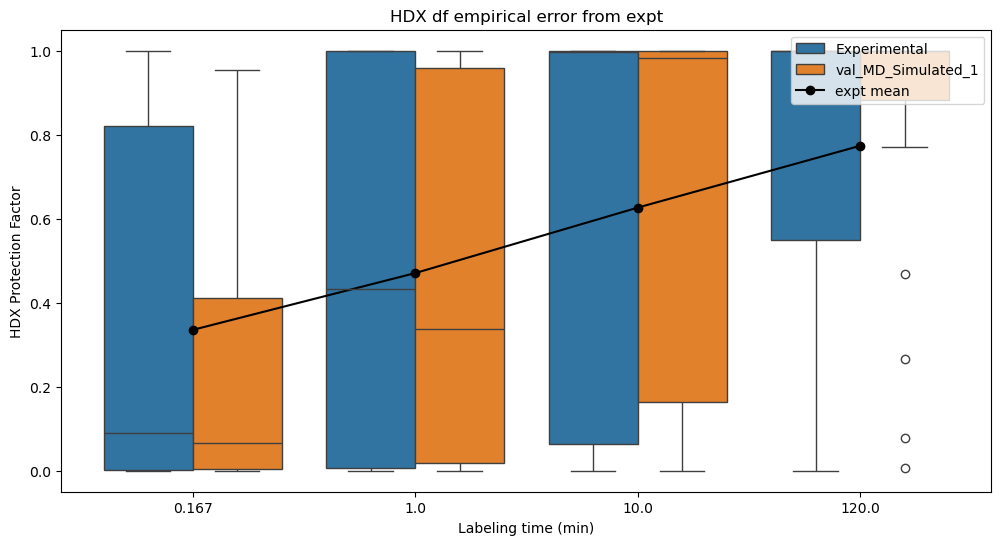

train_rep_names ['train_MD_Simulated_1']
val_rep_names ['val_MD_Simulated_1']
train_rep_peptides [24, 13, 8, 25, 4, 40, 19, 39, 29, 6, 26, 12, 17, 9, 15, 32, 16, 35, 34, 0]
val_rep_peptides [1, 2, 3, 5, 7, 10, 11, 14, 18, 20, 21, 22, 23, 27, 28, 30, 31, 33, 36, 37, 38]
manual merge df
      0.167      1.0     10.0    120.0  peptide             calc_name
0   0.00011  0.00064  0.00641  0.07424       24  train_MD_Simulated_1
1   0.00006  0.00036  0.00356  0.04188       13  train_MD_Simulated_1
2   0.00942  0.05511  0.43270  0.99889        8  train_MD_Simulated_1
3   0.00001  0.00008  0.00084  0.01007       25  train_MD_Simulated_1
4   0.72544  0.99956  1.00000  1.00000        4  train_MD_Simulated_1
5   0.01071  0.06242  0.47511  0.99956       40  train_MD_Simulated_1
6   0.10357  0.48042  0.99857  1.00000       19  train_MD_Simulated_1
7   0.01023  0.05972  0.45980  0.99938       39  train_MD_Simulated_1
8   1.00000  1.00000  1.00000  1.00000       29  train_MD_Simulated_1
9   0.73745  0

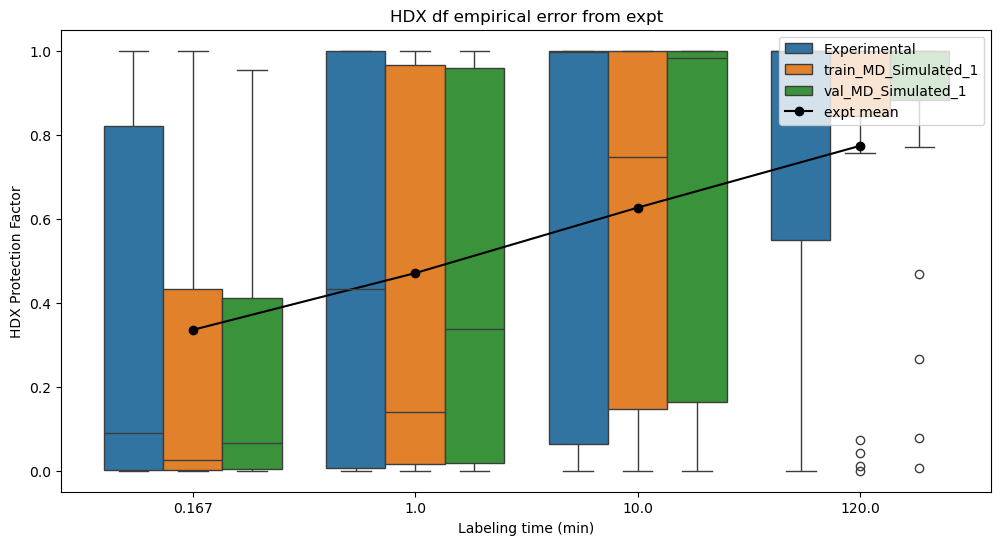

plotting paired errors
      0.167      1.0     10.0    120.0  peptide           calc_name
0   0.15669  0.63957  0.99996  1.00000        0        Experimental
1   0.09039  0.43293  0.99656  1.00000        1        Experimental
2   0.02665  0.14933  0.80157  1.00000        2        Experimental
3   0.18680  0.71010  1.00000  1.00000        3        Experimental
4   0.99880  1.00000  1.00000  1.00000        4        Experimental
..      ...      ...      ...      ...      ...                 ...
77  0.55745  0.99241  1.00000  1.00000       31  val_MD_Simulated_1
78  0.06616  0.33626  0.98340  1.00000       33  val_MD_Simulated_1
79  0.00408  0.02416  0.21693  0.94684       36  val_MD_Simulated_1
80  0.07162  0.35918  0.98832  1.00000       37  val_MD_Simulated_1
81  0.02767  0.15469  0.81373  1.00000       38  val_MD_Simulated_1

[82 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.00039, 1.0, 0.437

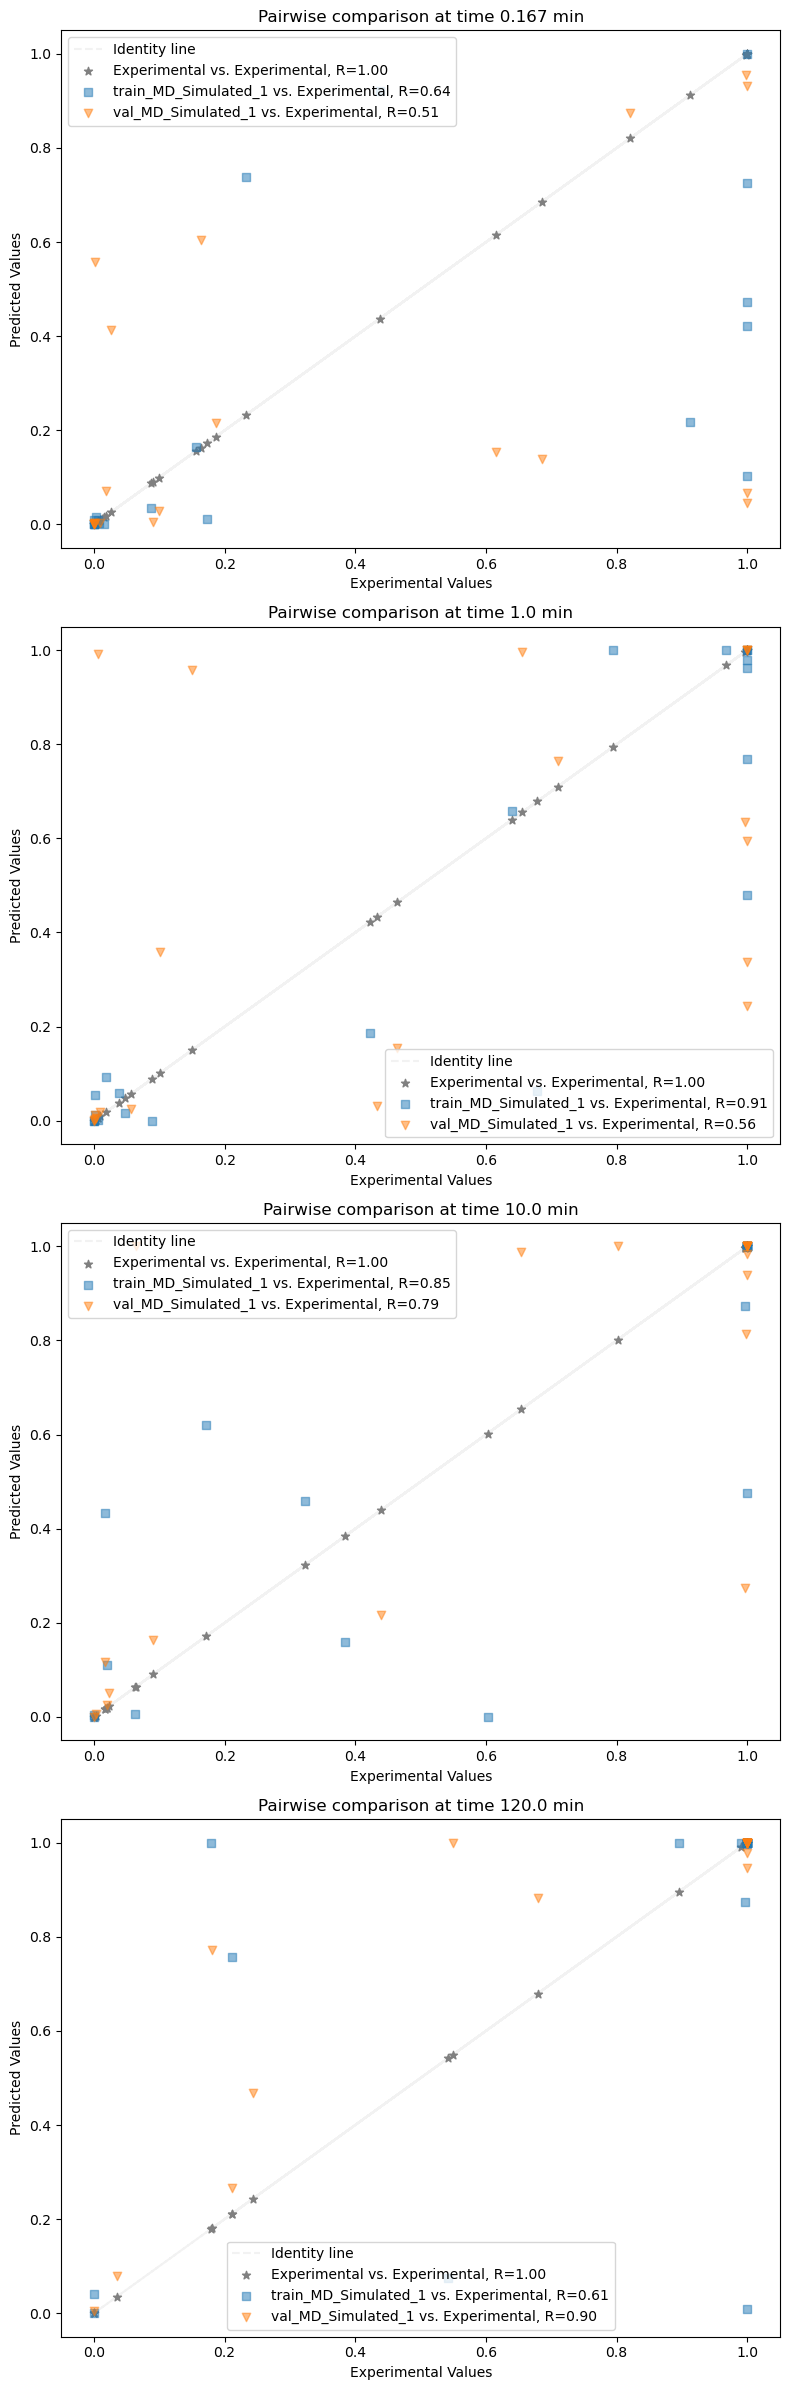

plotting paired trainval agreement
      0.167      1.0     10.0    120.0  peptide           calc_name
0   0.15669  0.63957  0.99996  1.00000        0        Experimental
1   0.09039  0.43293  0.99656  1.00000        1        Experimental
2   0.02665  0.14933  0.80157  1.00000        2        Experimental
3   0.18680  0.71010  1.00000  1.00000        3        Experimental
4   0.99880  1.00000  1.00000  1.00000        4        Experimental
..      ...      ...      ...      ...      ...                 ...
77  0.55745  0.99241  1.00000  1.00000       31  val_MD_Simulated_1
78  0.06616  0.33626  0.98340  1.00000       33  val_MD_Simulated_1
79  0.00408  0.02416  0.21693  0.94684       36  val_MD_Simulated_1
80  0.07162  0.35918  0.98832  1.00000       37  val_MD_Simulated_1
81  0.02767  0.15469  0.81373  1.00000       38  val_MD_Simulated_1

[82 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.00039

/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1345: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([[t, R, arg]], columns=["Time", "R", "calc_name"])])
/home/alexi/Documents/ValDX/ValDX/HDX_plots.py:1364: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  plot_df = pd.concat([plot_df, pd.DataFrame({"Time": t, "Type": "Train", "R": train_R})], ignore_index=True)


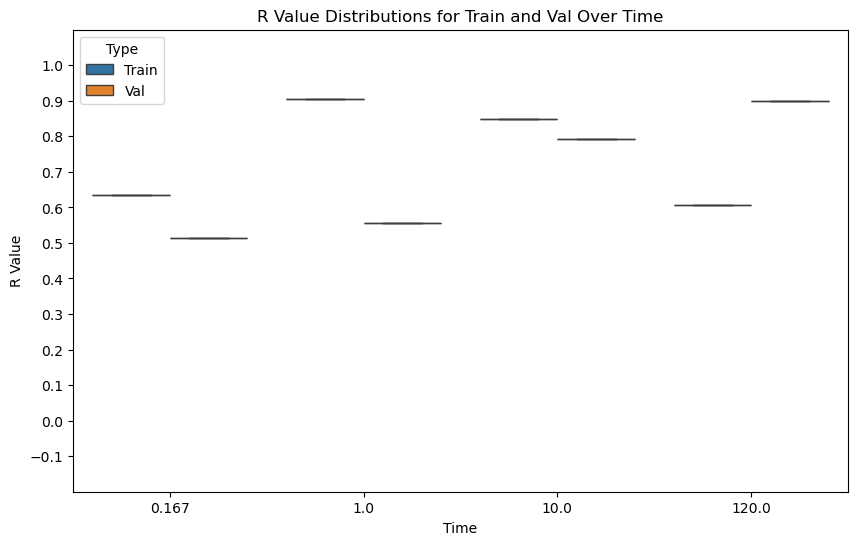

nan_df
      0.167      1.0     10.0    120.0  peptide             calc_name
0   0.00011  0.00064  0.00641  0.07424       24  train_MD_Simulated_1
1   0.00006  0.00036  0.00356  0.04188       13  train_MD_Simulated_1
2   0.00942  0.05511  0.43270  0.99889        8  train_MD_Simulated_1
3   0.00001  0.00008  0.00084  0.01007       25  train_MD_Simulated_1
4   0.72544  0.99956  1.00000  1.00000        4  train_MD_Simulated_1
..      ...      ...      ...      ...      ...                   ...
77  0.55745  0.99241  1.00000  1.00000       31    val_MD_Simulated_1
78  0.06616  0.33626  0.98340  1.00000       33    val_MD_Simulated_1
79  0.00408  0.02416  0.21693  0.94684       36    val_MD_Simulated_1
80  0.07162  0.35918  0.98832  1.00000       37    val_MD_Simulated_1
81  0.02767  0.15469  0.81373  1.00000       38    val_MD_Simulated_1

[82 rows x 6 columns]
nan_df + expt_df
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00641  0.07424   

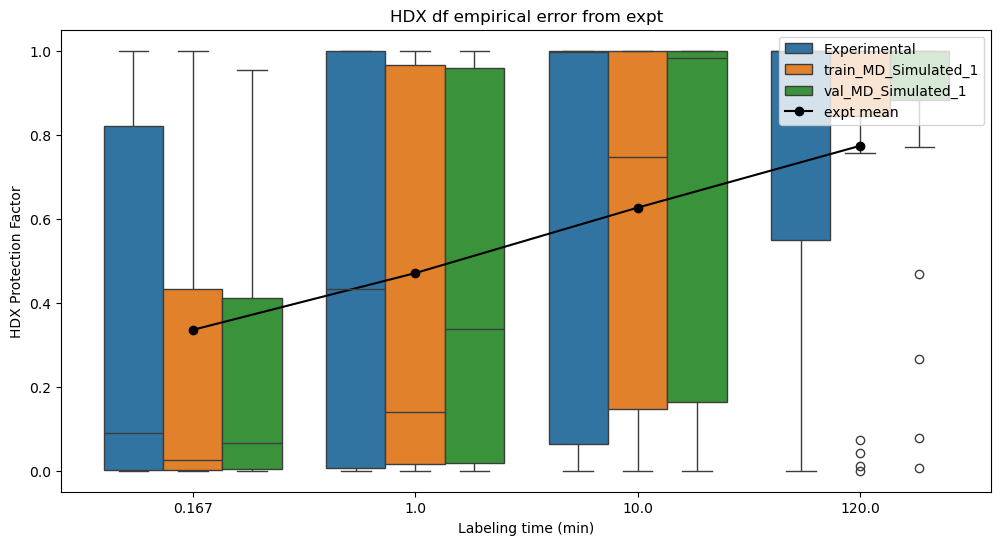

plot_dfracs_compare_abs
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00641  0.07424       24  train_MD_Simulated_1
1    0.00006  0.00036  0.00356  0.04188       13  train_MD_Simulated_1
2    0.00942  0.05511  0.43270  0.99889        8  train_MD_Simulated_1
3    0.00001  0.00008  0.00084  0.01007       25  train_MD_Simulated_1
4    0.72544  0.99956  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
118  0.00963  0.05627  0.43963  0.99904       36          Experimental
119  0.01757  0.10068  0.65396  1.00000       37          Experimental
120  0.09888  0.46390  0.99804  1.00000       38          Experimental
121  0.00650  0.03831  0.32339  0.99079       39          Experimental
122  0.17259  0.67841  0.99999  1.00000       40          Experimental

[123 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
82   0.15669  0.63957  0.99996  1.000

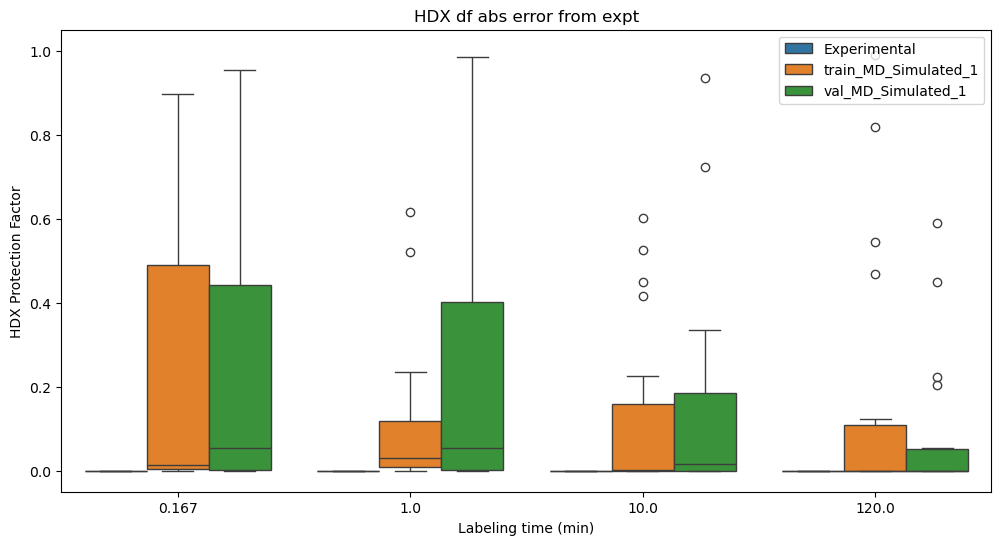

plot_dfracs_compare_MSE
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00641  0.07424       24  train_MD_Simulated_1
1    0.00006  0.00036  0.00356  0.04188       13  train_MD_Simulated_1
2    0.00942  0.05511  0.43270  0.99889        8  train_MD_Simulated_1
3    0.00001  0.00008  0.00084  0.01007       25  train_MD_Simulated_1
4    0.72544  0.99956  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
118  0.00963  0.05627  0.43963  0.99904       36          Experimental
119  0.01757  0.10068  0.65396  1.00000       37          Experimental
120  0.09888  0.46390  0.99804  1.00000       38          Experimental
121  0.00650  0.03831  0.32339  0.99079       39          Experimental
122  0.17259  0.67841  0.99999  1.00000       40          Experimental

[123 rows x 6 columns]
       0.167      1.0     10.0    120.0  peptide     calc_name
82   0.15669  0.63957  0.99996  1.000

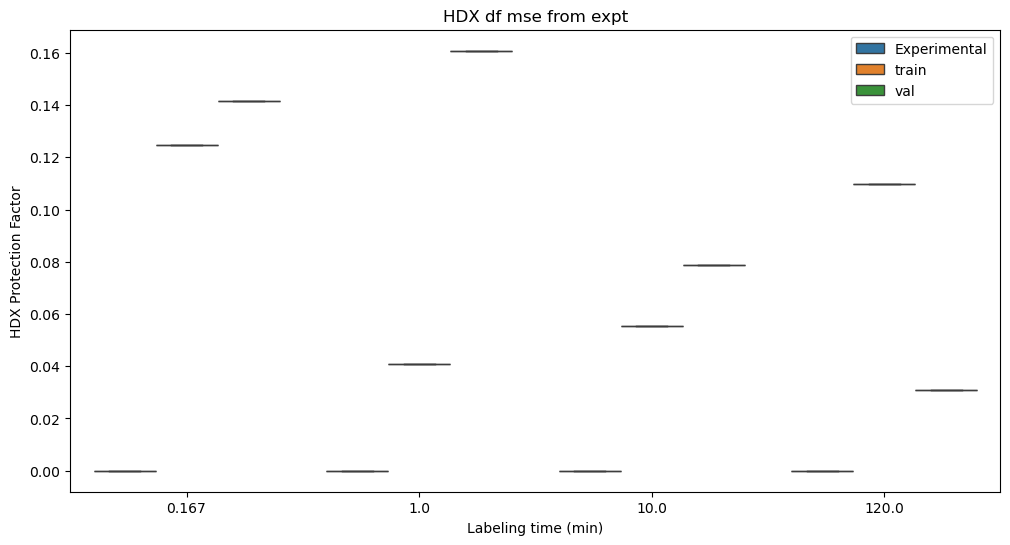

plotting paired errors
       0.167      1.0     10.0    120.0  peptide             calc_name
0    0.00011  0.00064  0.00641  0.07424       24  train_MD_Simulated_1
1    0.00006  0.00036  0.00356  0.04188       13  train_MD_Simulated_1
2    0.00942  0.05511  0.43270  0.99889        8  train_MD_Simulated_1
3    0.00001  0.00008  0.00084  0.01007       25  train_MD_Simulated_1
4    0.72544  0.99956  1.00000  1.00000        4  train_MD_Simulated_1
..       ...      ...      ...      ...      ...                   ...
118  0.00963  0.05627  0.43963  0.99904       36          Experimental
119  0.01757  0.10068  0.65396  1.00000       37          Experimental
120  0.09888  0.46390  0.99804  1.00000       38          Experimental
121  0.00650  0.03831  0.32339  0.99079       39          Experimental
122  0.17259  0.67841  0.99999  1.00000       40          Experimental

[123 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-0

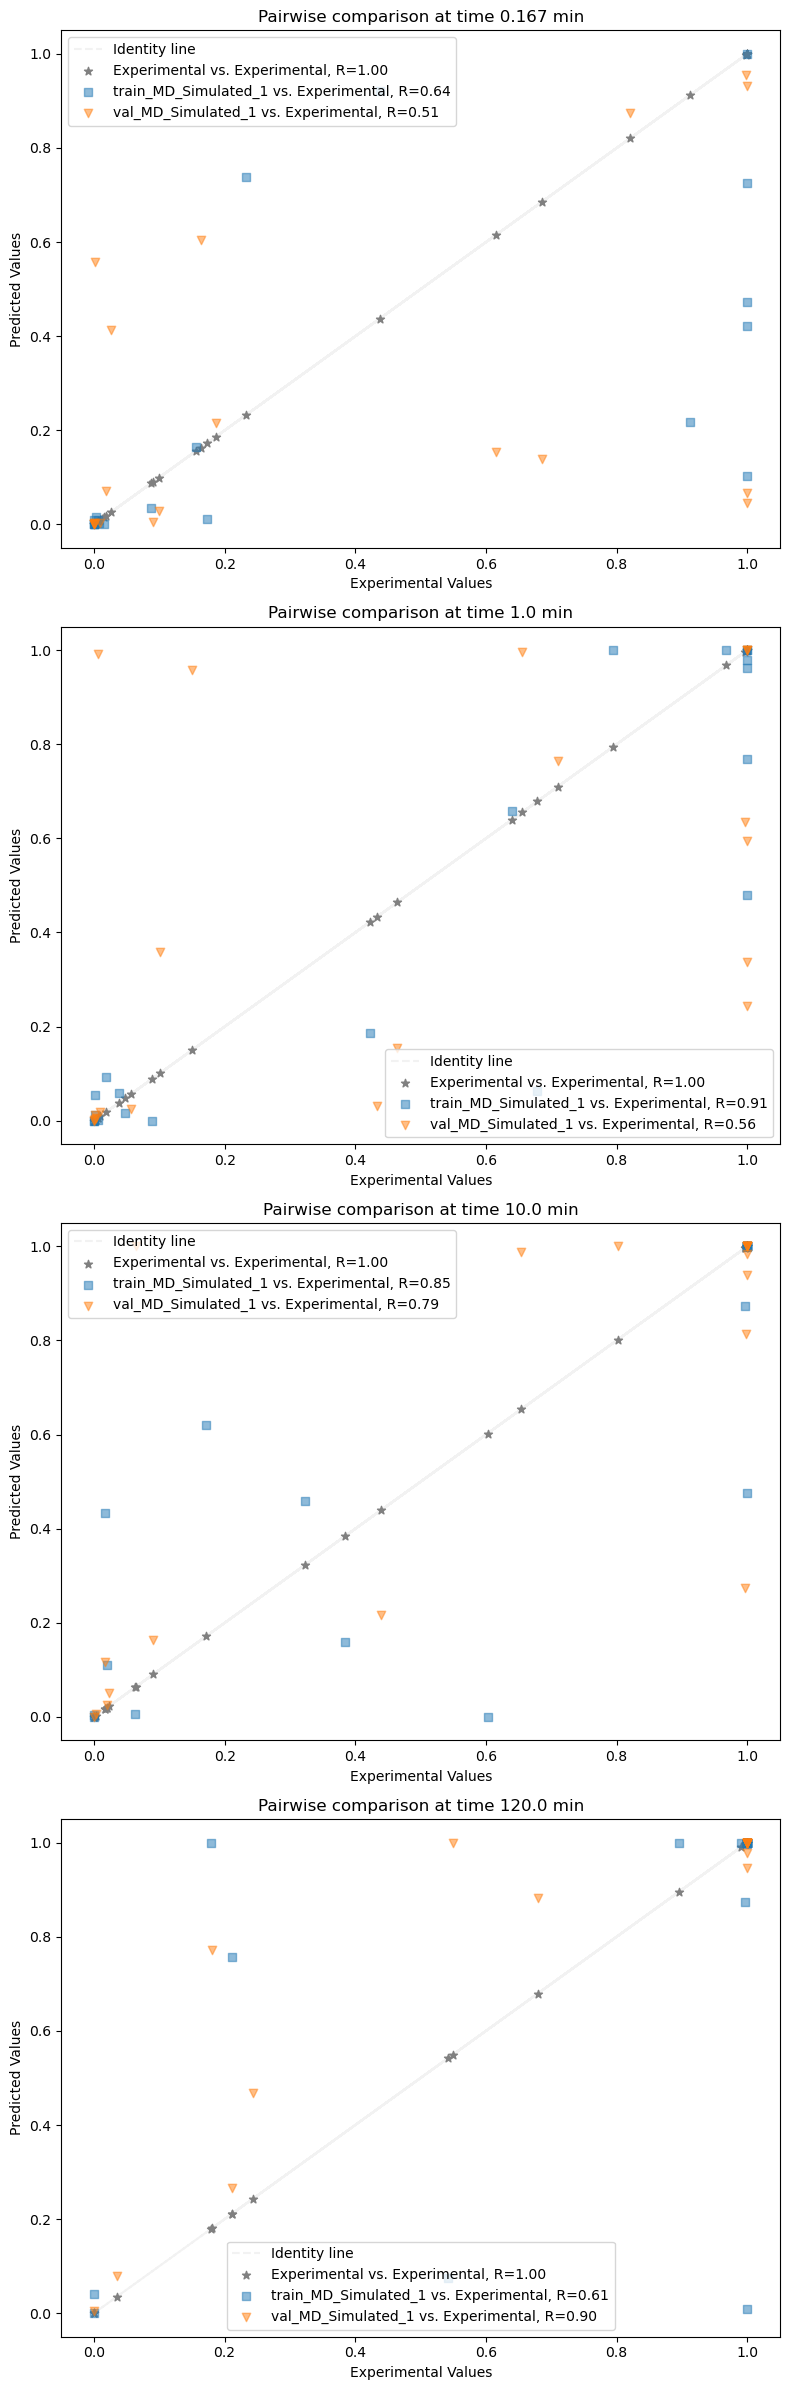

Train coverage: 48.78
Val coverage: 51.22
plot_dfracs_compare
      0.167      1.0     10.0  120.0  peptide             calc_name
0   0.15669  0.63957  0.99996    1.0        0          Experimental
1   0.09039  0.43293  0.99656    1.0        1          Experimental
2   0.02665  0.14933  0.80157    1.0        2          Experimental
3   0.18680  0.71010  1.00000    1.0        3          Experimental
4   0.99880  1.00000  1.00000    1.0        4          Experimental
..      ...      ...      ...    ...      ...                   ...
77  0.55745  0.99241  1.00000    1.0       31  val_MD_Simulated_avg
78  0.60509  0.99616  1.00000    1.0       28  val_MD_Simulated_avg
79  0.87459  1.00000  1.00000    1.0        5  val_MD_Simulated_avg
80  0.93167  1.00000  1.00000    1.0        7  val_MD_Simulated_avg
81  0.95440  1.00000  1.00000    1.0       30  val_MD_Simulated_avg

[82 rows x 6 columns]
      0.167      1.0     10.0    120.0  peptide     calc_name
0   0.15669  0.63957  0.99996  1.0000

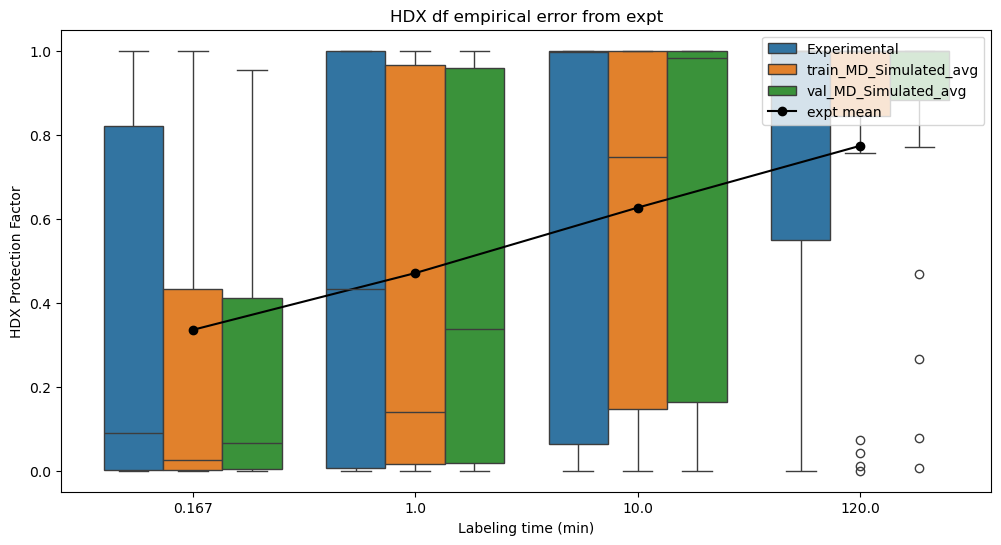

plotting paired errors
      0.167      1.0     10.0  120.0  peptide             calc_name
0   0.15669  0.63957  0.99996    1.0        0          Experimental
1   0.09039  0.43293  0.99656    1.0        1          Experimental
2   0.02665  0.14933  0.80157    1.0        2          Experimental
3   0.18680  0.71010  1.00000    1.0        3          Experimental
4   0.99880  1.00000  1.00000    1.0        4          Experimental
..      ...      ...      ...    ...      ...                   ...
77  0.55745  0.99241  1.00000    1.0       31  val_MD_Simulated_avg
78  0.60509  0.99616  1.00000    1.0       28  val_MD_Simulated_avg
79  0.87459  1.00000  1.00000    1.0        5  val_MD_Simulated_avg
80  0.93167  1.00000  1.00000    1.0        7  val_MD_Simulated_avg
81  0.95440  1.00000  1.00000    1.0       30  val_MD_Simulated_avg

[82 rows x 6 columns]
expt values
[0.15669, 0.09039, 0.02665, 0.1868, 0.9988, 0.82092, 0.23198, 1.0, 0.00028, 0.91192, 5e-05, 0.0, 0.0, 0.0, 0.00039, 1.0, 0.437

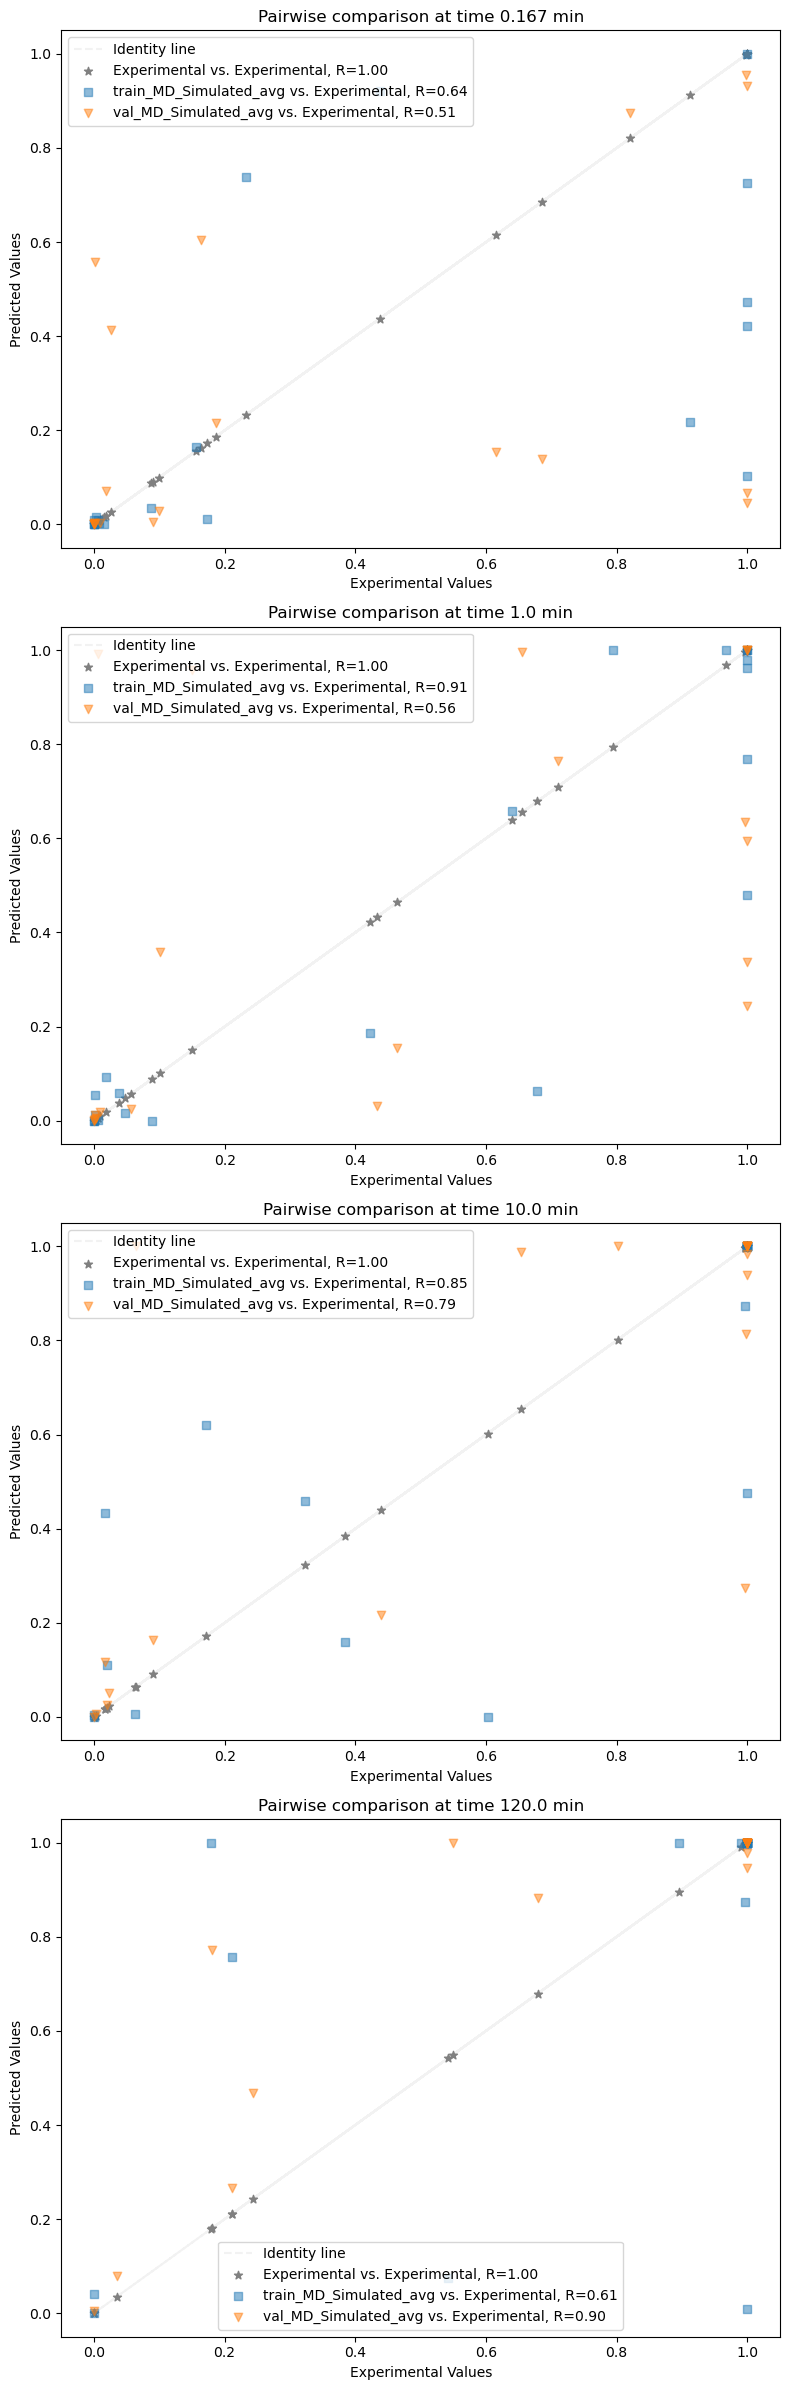

In [13]:
train_dfs, val_dfs, train_gammas, val_gammas = VDX.run_VDX(calc_name=test_name, expt_name=expt_name)

In [14]:
test_list = [i for i in range(1, 2)]
print(test_list)

[1]


In [15]:
VDX.save_experiment()

dump = train_dfs, val_dfs, train_gammas, val_gammas

import pickle
with open(f'dump_{VDX.name}.pickle', 'wb') as f:
    print(f"Saving pickle", f'dump_{VDX.name}.pickle')
    pickle.dump(dump, f)

Saving experiment to:  logs/test_full0.516_1706288426.pkl
Saving pickle dump_test_full0.516.pickle


/home/alexi/Documents/ValDX/ValDX/Experiment_ABC.py:430: UserWarning: Reader has no dt information, set to 1.0 ps
  pickle.dump(self, f)


In [16]:
break


SyntaxError: 'break' outside loop (370545404.py, line 1)

In [ ]:
VDX = VDX.load_experiment(load_path='logs/test_full0.53_1705423086.pkl')

In [ ]:
with open('dump_test_full0.53.pickle', 'rb') as f:
    dump = pickle.load(f)

train_dfs, val_dfs, train_gammas, val_gammas = dump

VDX.evaluate_HDX(train_dfs=train_dfs, 
                 val_dfs=val_dfs, 
                 calc_name=test_name,
                 expt_name=expt_name,
                 train_gammas=train_gammas, 
                 val_gammas=val_gammas, 
                 n_reps=VDX.settings.replicates,
                   )

In [ ]:
import pandas as pd

In [ ]:
# file_name = "covid_submissions_all_info.csv"

In [ ]:
# sub_test = pd.read_csv(file_name)

In [ ]:
# sub_test.columns.to_list()